In [1]:
from datasets import load_dataset

case_hold = load_dataset("lex_glue", "case_hold")
print(case_hold["train"][1])  # View first sample

c:\Users\manan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\manan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


{'context': 'Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management information, design, process, procedure, formula, invention or improvement”); Warner-Lambert Co., 427 Mass. at 49 (“ [Confidential and proprietary business information may be entitled to protection, even if such information cannot claim trade secret protection”); see, e.g., Augat, Inc., 409 Mass. at 173 (<HOLDING>). “Matters of public knowledge or of general', 'endings': ['recognizing that even if a plaintiff claims certain information constitutes trade secrets its claim may not depend on t

In [2]:
# Get dataset statistics and structure
print("Dataset structure:", case_hold)
print("\nAvailable splits:", case_hold.keys())

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3600
    })
    validation: Dataset({
        features: ['context', 'endings', 'label'],
        num_rows: 3900
    })
})

Available splits: dict_keys(['train', 'test', 'validation'])


In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Get sample sizes
print(f"Train samples: {len(case_hold['train'])}")
print(f"Validation samples: {len(case_hold['validation'])}")
print(f"Test samples: {len(case_hold['test'])}")

Train samples: 45000
Validation samples: 3900
Test samples: 3600


In [13]:
# Get sample text from the dataset
# Fetch the entire 'context' column as a list
sample_text = case_hold["train"]["context"]

print(f"Number of training examples: {len(sample_text)}")

# Print the first 5 contexts (truncated)
for i, ctx in enumerate(sample_text[:5]):
    print(f"\n--- Sample {i} ---")
    print(ctx[:500] + "...\n")


Number of training examples: 45000

--- Sample 0 ---
Drapeau’s cohorts, the cohort would be a “victim” of making the bomb. Further, firebombs are inherently dangerous. There is no peaceful purpose for making a bomb. Felony offenses that involve explosives qualify as “violent crimes” for purposes of enhancing the sentences of career offenders. See 18 U.S.C. § 924(e)(2)(B)(ii) (defining a “violent felony” as: “any crime punishable by imprisonment for a term exceeding one year ... that ... involves use of explosives”). Courts have found possession of...


--- Sample 1 ---
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a se

## Text Preprocessing Pipeline

We'll apply the following preprocessing steps to the legal text data:

1. Tokenization (split text into individual words)
2. Lowercasing (convert all text to lowercase)
3. Stopword removal (remove common words like 'the', 'and', etc.)
4. Punctuation removal (remove punctuation marks)
5. Frequency analysis of the resulting tokens

In [14]:
# Define preprocessing functions
def tokenize_text(text):
    """Split text into individual words"""
    return word_tokenize(text)

def lowercase_tokens(tokens):
    """Convert all tokens to lowercase"""
    return [token.lower() for token in tokens]

def remove_stopwords(tokens):
    """Remove common stopwords"""
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token.lower() not in stop_words]

def remove_punctuation(tokens):
    """Remove punctuation and non-alphanumeric tokens"""
    return [token for token in tokens if token.isalnum()]

def preprocess_text(text):
    """Apply all preprocessing steps in sequence"""
    tokens = tokenize_text(text)
    tokens_lower = lowercase_tokens(tokens)
    tokens_no_stop = remove_stopwords(tokens_lower)
    tokens_no_punct = remove_punctuation(tokens_no_stop)
    return {
        'original': text,
        'tokenized': tokens,
        'lowercase': tokens_lower,
        'no_stopwords': tokens_no_stop,
        'no_punctuation': tokens_no_punct
    }

In [33]:
# Apply preprocessing to all samples
preprocessed_samples = []
for i, text in enumerate(sample_text):
    if i < 45000: # Limit to first 45000 samples for demonstration
        preprocessed_samples.append(preprocess_text(text))
    else:
        break

print(f"Preprocessed {len(preprocessed_samples)} samples")

# Convert preprocessed data to a format suitable for CSV
preprocessed_data = []
for i, sample in enumerate(preprocessed_samples):
    # Create a row for each sample with sample index and preprocessing stages
    sample_data = {
        'sample_id': i,
        'original_text': sample['original'],  # Truncate original text to avoid huge CSV
        'tokens_clean': ' '.join(sample['no_punctuation'])
    }
    preprocessed_data.append(sample_data)

# Convert to DataFrame
import pandas as pd
import os

# Convert to DataFrame
df = pd.DataFrame(preprocessed_data)

# Create directory for output if it doesn't exist
output_dir = "preprocessed_data"
os.makedirs(output_dir, exist_ok=True)

# Save to CSV
csv_path = os.path.join(output_dir, "preprocessed_samples.csv")
df.to_csv(csv_path, index=False)

print(f"\nSaved preprocessed data to {csv_path}")
print(f"DataFrame shape: {df.shape}")

# Display the first few rows of the DataFrame
print("\nPreview of the saved data:")
display(df.head())

KeyboardInterrupt: 

## Detailed Analysis of any sample for dislaying Preprocessing Steps

In [34]:
# Focus on Sample 1 for detailed analysis
sample_idx = 1
sample = preprocessed_samples[sample_idx]

# Original text
print(f"ORIGINAL TEXT (truncated):\n{sample['original'][:500]}...\n")

# Step 1: Tokenization
print(f"STEP 1: TOKENIZATION (first 50 tokens)")
print(sample['tokenized'][:78])
print(f"Total tokens: {len(sample['tokenized'])}\n")

# Step 2: Lowercase
print(f"STEP 2: LOWERCASE (first 50 tokens)")
print(sample['lowercase'][:78])
print(f"Total tokens: {len(sample['lowercase'])}\n")

# Step 3: Stopword Removal
print(f"STEP 3: STOPWORD REMOVAL (first 50 tokens)")
print(sample['no_stopwords'][:78])
print(f"Total tokens: {len(sample['no_stopwords'])}\n")

# Step 4: Punctuation Removal
print(f"STEP 4: PUNCTUATION REMOVAL (first 50 tokens)")
print(sample['no_punctuation'][:78])
print(f"Total tokens: {len(sample['no_punctuation'])}\n")

ORIGINAL TEXT (truncated):
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management informat...

STEP 1: TOKENIZATION (first 50 tokens)
['Colameta', 'used', 'customer', 'information', 'that', 'he', 'took', 'from', 'Protégé', '.', 'Additionally', ',', 'Colameta', 'admits', 'to', 'having', 'taken', 'at', 'least', 'two', 'Protégé', 'proposals', 'with', 'him', 'to', 'Monument', '.', 'This', 'type', 'of', 'information', 'may', 'constitute', 'trade', 'secrets', '.', 'See', 'G.L.c', '.', '266', ',', '§30', '(', 'defining', '“', 'trade', 'secret', '”', 'as', 'used', 

In [35]:
# Frequency Analysis for Sample 1
tokens_sample1 = sample['no_punctuation']
word_freq = Counter(tokens_sample1)

# Display most common words
print("TOP 20 WORDS IN SAMPLE 1 (after preprocessing):")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

TOP 20 WORDS IN SAMPLE 1 (after preprocessing):
information: 5
trade: 3
secret: 3
colameta: 2
used: 2
protégé: 2
may: 2
see: 2
mass: 2
protection: 2
customer: 1
took: 1
additionally: 1
admits: 1
taken: 1
least: 1
two: 1
proposals: 1
monument: 1
type: 1


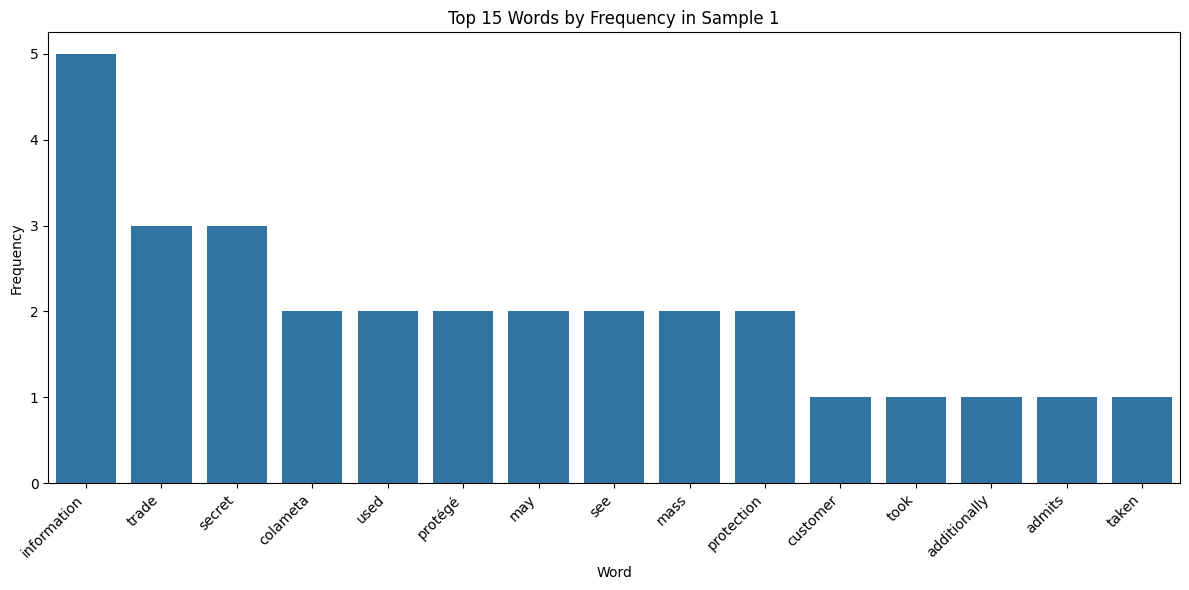

In [36]:
# Visualize the word frequency
plt.figure(figsize=(12, 6))
top_words = dict(word_freq.most_common(15))
sns.barplot(x=list(top_words.keys()), y=list(top_words.values()))
plt.title('Top 15 Words by Frequency in Sample 1')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Aggregated Analysis Across All Preprocessed Samples

In [37]:
# Combine all preprocessed tokens
all_tokens = []
for sample in preprocessed_samples:
    all_tokens.extend(sample['no_punctuation'])

# Calculate frequency distribution
all_word_freq = Counter(all_tokens)

print(f"Total unique words across all samples: {len(all_word_freq)}")
print("\nTOP 20 WORDS ACROSS ALL SAMPLES:")
for word, count in all_word_freq.most_common(20):
    print(f"{word}: {count}")

Total unique words across all samples: 42420

TOP 20 WORDS ACROSS ALL SAMPLES:
see: 11874
holding: 10903
court: 10875
state: 5295
also: 4196
states: 4116
united: 3902
id: 3209
evidence: 3029
defendant: 3004
case: 2880
trial: 2836
law: 2751
may: 2639
district: 2583
claim: 2546
would: 2454
whether: 2327
1: 2285
2: 1947


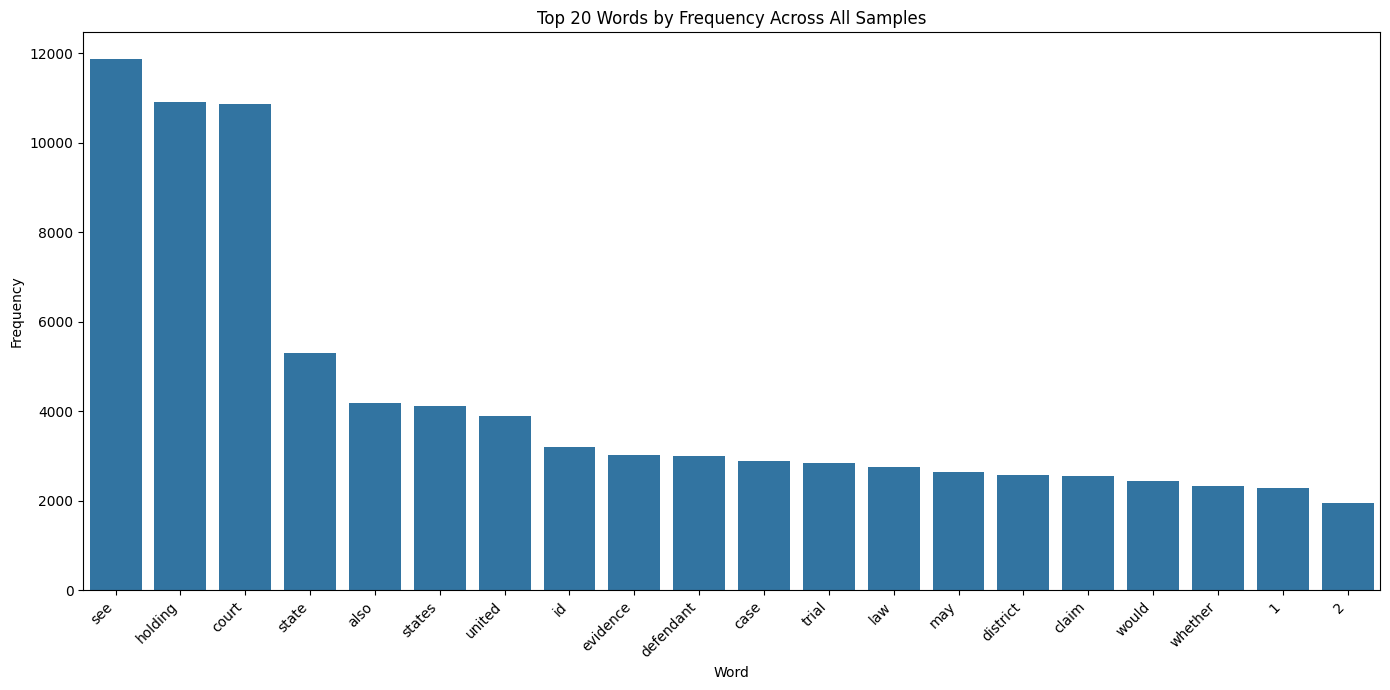

In [38]:
# Visualize word frequency across all samples
plt.figure(figsize=(14, 7))
top_all_words = dict(all_word_freq.most_common(20))
sns.barplot(x=list(top_all_words.keys()), y=list(top_all_words.values()))
plt.title('Top 20 Words by Frequency Across All Samples')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Named Entity Recognition (NER) on Individual Samples

We'll perform NER on each preprocessed sample individually to extract legal entities such as people, organizations, laws, etc.

In [39]:
# Install spaCy if not already installed
# !pip install spacy
# !python -m spacy download en_core_web_sm

import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

# Load the spaCy model
print("Loading spaCy model...")
nlp = spacy.load('en_core_web_lg')
print("Model loaded successfully!")

c:\Users\manan\anaconda3\lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Loading spaCy model...
Model loaded successfully!
Model loaded successfully!


In [40]:
# Load the preprocessed data
try:
    # If preprocessed data is already in memory, use it
    df.head()
except NameError:
    # Otherwise, load from file
    csv_path = os.path.join("preprocessed_data", "preprocessed_samples.csv")
    df = pd.read_csv(csv_path)
    print(f"Loaded {len(df)} preprocessed samples from {csv_path}")

# Display first few rows
df.head()

,sample_id,original_text,tokens_clean
0,0,"Drapeau’s cohorts, the cohort would be a “vict...",drapeau cohorts cohort would victim making bom...
1,1,Colameta used customer information that he too...,colameta used customer information took protég...
2,2,property tax sale. In reviewing section 6323(b...,property tax sale reviewing section 6323 b 6 c...
3,3,They also rely on Oswego Laborers’ Local 214 P...,also rely oswego laborers local 214 pension fu...
4,4,did not affect the defendant’s guideline range...,affect defendant guideline range sentence redu...


In [41]:
# Function to process entities for a single sample
def extract_entities(text):
    """
    Process a text sample with spaCy and extract entities.
    
    Args:
        text (str): The text to process
        
    Returns:
        tuple: (doc, entities_dict) where:
            - doc is the processed spaCy Doc object
            - entities_dict is a dictionary of entity lists by type
    """
    # Process with spaCy
    doc = nlp(text)
    
    # Initialize entity dictionary
    legal_entities = {
        "PERSON": [],    # People names
        "ORG": [],       # Organizations
        "DATE": [],      # Dates
        "MONEY": [],     # Monetary values
        "LAW": [],       # Laws (may be captured as ORG in some models)
        "GPE": [],       # Geopolitical entities (countries, cities)
        "NORP": [],      # Nationalities, religious or political groups
        "CARDINAL": [],  # Numbers
        "ORDINAL": []    # Ordinal numbers (First, Second, etc.)
    }
    
    # Extract entities
    for ent in doc.ents:
        if ent.label_ in legal_entities:
            legal_entities[ent.label_].append(ent.text)
    
    return doc, legal_entities

In [42]:
# Process the first 5 samples to demonstrate
num_samples = 5

results = []
for i in range(min(num_samples, len(df))):
    sample = df.iloc[i]
    text = sample['original_text']  # Use original text for better entity extraction
    sample_id = sample['sample_id']
    
    # Process text (truncate to first 1000 chars to avoid processing too much)
    doc, entities = extract_entities(text[:1000])
    
    # Store results
    results.append({
        "sample_id": sample_id,
        "text": text[:500] + "...",  # For display purposes
        "doc": doc,
        "entities": entities
    })

# Show first result
print(f"Processed {len(results)} samples")

Processed 5 samples


In [44]:
# Display entity visualization for the first sample
sample_idx = 1  # Change this to view different samples
sample_result = results[sample_idx]

print(f"Sample ID: {sample_result['sample_id']}")
print("Sample text (truncated):")
print(sample_result['text'])
print("\nEntities found:")

# Display entity visualization
displacy.render(sample_result['doc'], style="ent", jupyter=True)

# Display entity counts by type
print("\nEntity counts by type:")
for entity_type, entities in sample_result['entities'].items():
    if entities:  # Only show non-empty entity types
        print(f"{entity_type}: {len(entities)} ({', '.join(entities[:5])}{'...' if len(entities) > 5 else ''})")

Sample ID: 1
Sample text (truncated):
Colameta used customer information that he took from Protégé. Additionally, Colameta admits to having taken at least two Protégé proposals with him to Monument. This type of information may constitute trade secrets. See G.L.c. 266, §30 (defining “trade secret” as used in G.L.c. 93, §42, as including “anything tangible or intangible or electronically kept or stored, which constitutes, represents, evidences or records a secret scientific, technical, merchandising, production or management informat...

Entities found:



Entity counts by type:
ORG: 6 (Colameta, Colameta, G.L.c, G.L.c, Warner-Lambert Co....)
DATE: 1 (49)
GPE: 2 (Mass., Mass.)
CARDINAL: 7 (at least two, 266, 93, 42, 427...)


In [45]:
# Function to process a batch of samples
def process_batch(df, start_idx, batch_size):
    batch_results = []
    
    for i in range(start_idx, min(start_idx + batch_size, len(df))):
        sample = df.iloc[i]
        text = sample['original_text']
        sample_id = sample['sample_id']
        
        try:
            # Process only the first 1000 characters to save time
            doc, entities = extract_entities(text[:1000])
            
            # Count entities by type
            entity_counts = {entity_type: len(entities_list) 
                            for entity_type, entities_list in entities.items()}
            
            # Store results with entity counts
            batch_results.append({
                "sample_id": sample_id,
                "entity_counts": entity_counts,
                "entities": entities
            })
        except Exception as e:
            print(f"Error processing sample {sample_id}: {e}")
    
    return batch_results

In [46]:
# Process a larger batch of samples
batch_size = 50  # Adjust this number based on your available memory and time constraints
start_idx = 0

print(f"Processing {batch_size} samples starting from index {start_idx}...")
batch_results = process_batch(df, start_idx, batch_size)
print(f"Successfully processed {len(batch_results)} samples")

# Convert results to DataFrame for easier analysis
entities_df = pd.DataFrame(batch_results)

# Add columns for each entity type count
for entity_type in next(iter(batch_results))['entity_counts'].keys():
    entities_df[entity_type] = entities_df['entity_counts'].apply(lambda x: x.get(entity_type, 0))

# Display summary
print("\nSummary of entity counts across samples:")
entity_cols = [col for col in entities_df.columns if col not in ['sample_id', 'entity_counts', 'entities']]
print(entities_df[entity_cols].describe())

# Calculate total counts by entity type
total_counts = entities_df[entity_cols].sum().sort_values(ascending=False)
print("\nTotal entity counts by type:")
print(total_counts)

Processing 50 samples starting from index 0...
Successfully processed 50 samples

Summary of entity counts across samples:
          PERSON        ORG       DATE      MONEY        LAW        GPE  \
count  50.000000  50.000000  50.000000  50.000000  50.000000  50.000000   
mean    2.500000   3.880000   2.080000   0.240000   0.360000   1.740000   
std     1.669046   2.592296   1.759406   0.656521   0.942424   1.601148   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     1.000000   2.000000   1.000000   0.000000   0.000000   0.000000   
50%     2.000000   3.500000   2.000000   0.000000   0.000000   2.000000   
75%     3.000000   6.000000   3.000000   0.000000   0.000000   2.000000   
max     6.000000  10.000000   7.000000   4.000000   5.000000   8.000000   

            NORP   CARDINAL    ORDINAL  
count  50.000000  50.000000  50.000000  
mean    0.040000   7.540000   0.760000  
std     0.197949   5.489173   1.079682  
min     0.000000   0.000000   0.00000

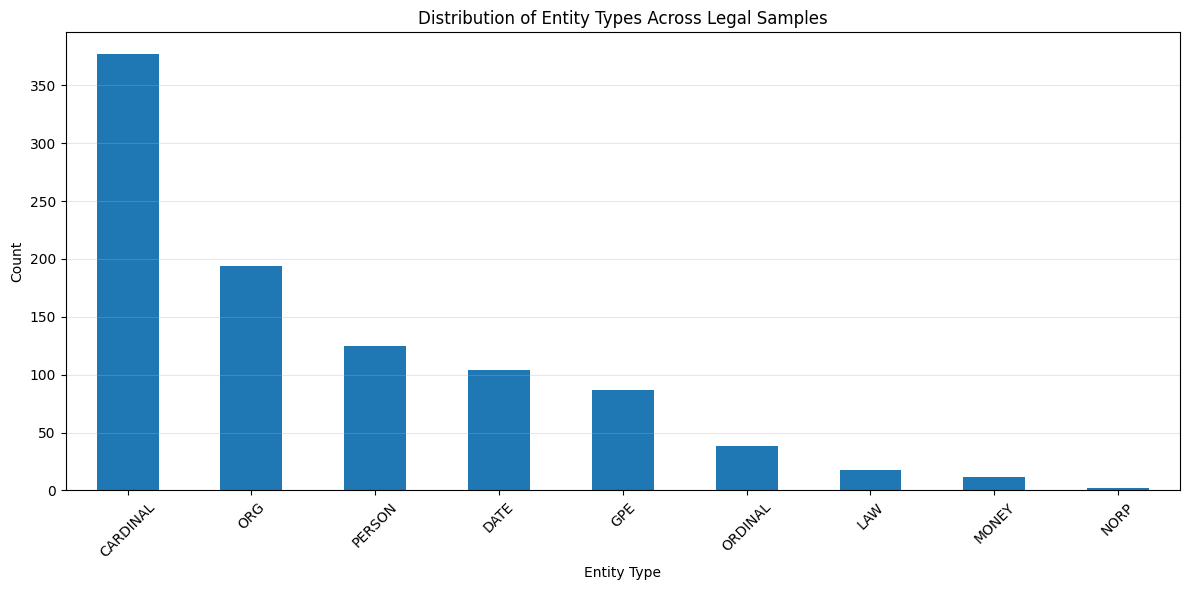

In [47]:
# Visualize distribution of entities across samples
plt.figure(figsize=(12, 6))
total_counts.plot(kind='bar')
plt.title('Distribution of Entity Types Across Legal Samples')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Analyze most common entities by type
def get_most_common_entities(results, entity_type, top_n=10):
    """Get the most common entities of a specific type"""
    all_entities = []
    for result in results:
        all_entities.extend(result['entities'].get(entity_type, []))
    
    counter = Counter(all_entities)
    return counter.most_common(top_n)

# Display most common entities for each type
entity_types_of_interest = ['ORG', 'PERSON', 'GPE', 'DATE', 'LAW']

for entity_type in entity_types_of_interest:
    most_common = get_most_common_entities(batch_results, entity_type)
    
    if most_common:  # Only display if there are entities of this type
        print(f"\nMost common {entity_type} entities:")
        for entity, count in most_common:
            print(f"  {entity}: {count}")
            
        # Plot top entities
        plt.figure(figsize=(10, 5))
        labels, values = zip(*most_common)
        plt.barh(labels, values)
        plt.title(f'Most Common {entity_type} Entities')
        plt.xlabel('Frequency')
        plt.tight_layout()
        plt.show()

In [ ]:
# Find samples with the most entities of each type
def find_samples_with_most_entities(df_entities, entity_type, top_n=5):
    """Find samples with the most entities of a specific type"""
    if entity_type not in df_entities.columns:
        return []
    
    # Sort by entity count in descending order
    samples = df_entities.sort_values(by=entity_type, ascending=False).head(top_n)
    return samples[['sample_id', entity_type]].values.tolist()

# Find interesting samples for each entity type
print("Samples with the most entities by type:")
for entity_type in entity_types_of_interest:
    top_samples = find_samples_with_most_entities(entities_df, entity_type)
    
    if top_samples:  # Only display if there are entities of this type
        print(f"\nSamples with most {entity_type} entities:")
        for sample_id, count in top_samples:
            if count > 0:  # Only show samples that have entities of this type
                print(f"  Sample {sample_id}: {count} entities")

In [ ]:
# Function to display entity details for a specific sample
def display_sample_entities(df, batch_results, sample_id):
    """Display detailed entity information for a specific sample"""
    # Find the sample in the DataFrame
    sample = df[df['sample_id'] == sample_id].iloc[0]
    
    # Find the corresponding batch result
    batch_result = next((r for r in batch_results if r['sample_id'] == sample_id), None)
    
    if batch_result is None:
        print(f"Sample {sample_id} not found in batch results.")
        return
    
    # Display sample information
    print(f"Sample ID: {sample_id}")
    print("Original text (truncated):")
    print(sample['original_text'][:500] + "...\n")
    
    # Display entities by type
    print("Entities by type:")
    for entity_type, entities in batch_result['entities'].items():
        if entities:  # Only show non-empty entity types
            print(f"\n{entity_type}:")
            for entity in set(entities):  # Show unique entities
                print(f"  • {entity}")
    
    # Process the text for visualization
    short_sample = sample['original_text'][:500]
    doc = nlp(short_sample)
    
    # Visualize entities
    print("\nVisualization of entities in text (first 500 characters):")
    displacy.render(doc, style="ent", jupyter=True)

In [ ]:
# Choose a sample with interesting entities to display
# Look for a sample with a good mix of entity types
interesting_sample_id = entities_df['ORG'].idxmax()  # Sample with most organizations
interesting_sample_id = entities_df.iloc[interesting_sample_id]['sample_id']

# Display detailed entities for the chosen sample
display_sample_entities(df, batch_results, interesting_sample_id)

In [ ]:
# Export entity data to CSV for further analysis
# Remove the large entities dictionary to make the DataFrame more manageable
export_df = entities_df.drop(columns=['entities'])

# Save to CSV
entity_csv_path = os.path.join("preprocessed_data", "entity_analysis.csv")
export_df.to_csv(entity_csv_path, index=False)

print(f"Saved entity analysis to {entity_csv_path}")